# Imports 

In [194]:
import pandas as pd

In [387]:
import datetime

# Load data 

In [195]:
transactions = pd.read_csv('../data/transactions.csv')

In [196]:
accounts = pd.read_csv('../data/accounts.csv')

In [197]:
users = pd.read_csv('../data/users.csv')

# Explore transactions

In [198]:
transactions.head()

,date,amount,account_id
0,2019-12-16,-29.09,1
1,2019-12-16,160.00,1
2,2019-12-16,-14.00,1
3,2019-12-17,-94.50,1
4,2019-12-17,50.00,1


In [199]:
transactions.shape

(191398, 3)

In [200]:
transactions.describe()

,amount,account_id
count,191398.000000,191398.000000
mean,3.902326,224.494054
std,1202.288020,127.191401
min,-82201.680000,0.000000
25%,-53.700000,110.000000
50%,-15.900000,226.000000
75%,-2.000000,337.000000
max,83340.000000,440.000000


In [201]:
transactions.dtypes

date           object
amount        float64
account_id      int64
dtype: object

In [202]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191398 entries, 0 to 191397
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        191398 non-null  object 
 1   amount      191398 non-null  float64
 2   account_id  191398 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ MB


In [203]:
transactions.duplicated().value_counts()

False    181542
True       9856
dtype: int64

In [204]:
transactions.columns

Index(['date', 'amount', 'account_id'], dtype='object')

In [205]:
transactions.date = pd.to_datetime(transactions.date)

In [206]:
transactions.dtypes

date          datetime64[ns]
amount               float64
account_id             int64
dtype: object

# Explore accounts 

In [207]:
accounts.head()

,id,balance,user_id
0,0,3000.00,112
1,1,-465.66,112
2,2,372.81,104
3,3,229.73,198
4,4,1998.48,316


In [208]:
accounts.shape

(441, 3)

In [209]:
accounts.describe()

,id,balance,user_id
count,441.00000,441.000000,441.000000
mean,220.00000,1978.075986,172.231293
std,127.44999,9892.338349,99.099541
min,0.00000,-13474.330000,0.000000
25%,110.00000,0.480000,85.000000
50%,220.00000,59.200000,172.000000
75%,330.00000,1169.360000,258.000000
max,440.00000,154251.970000,342.000000


In [210]:
accounts.dtypes

id           int64
balance    float64
user_id      int64
dtype: object

In [211]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       441 non-null    int64  
 1   balance  441 non-null    float64
 2   user_id  441 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.5 KB


In [212]:
accounts.duplicated().value_counts()

False    441
dtype: int64

In [213]:
accounts.columns

Index(['id', 'balance', 'user_id'], dtype='object')

In [214]:
accounts.user_id.nunique()

343

In [215]:
accounts.user_id[accounts.user_id.duplicated()]

1      112
13     197
18     243
21     146
23     222
      ... 
426    156
427    156
429     13
436    326
440     77
Name: user_id, Length: 98, dtype: int64

In [216]:
accounts[accounts.user_id == 156]

,id,balance,user_id
424,424,230.50,156
425,425,5.14,156
426,426,1.15,156
427,427,234.87,156


# Explore users

In [218]:
users.head()

,id;update_date
0,0;27/09/2020
1,1;27/09/2020
2,2;27/09/2020
3,3;27/09/2020
4,4;27/09/2020


In [219]:
users.shape

(343, 1)

In [220]:
users.columns

Index(['id;update_date'], dtype='object')

In [221]:
# users has one column separated with colon, let's make it 2 columns
# rename id to user_id to further merge with other datasets
users[['user_id', 'update_date']] = users['id;update_date'].str.split(";",expand=True,)
# drop splitted column
users.drop(columns='id;update_date',inplace=True)


# or could have loaded from csv separeated with  colon ->
# users = pd.read_csv('../data/users.csv', sep=';')

In [222]:
users.describe()

,user_id,update_date
count,343,343
unique,343,2
top,0,27/09/2020
freq,1,312


In [223]:
users.head()

,user_id,update_date
0,0,27/09/2020
1,1,27/09/2020
2,2,27/09/2020
3,3,27/09/2020
4,4,27/09/2020


In [224]:
users.dtypes

user_id        object
update_date    object
dtype: object

In [225]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      343 non-null    object
 1   update_date  343 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [226]:
users.duplicated().value_counts()

False    343
dtype: int64

In [227]:
users.columns

Index(['user_id', 'update_date'], dtype='object')

In [228]:
users.update_date = pd.to_datetime(users.update_date)

In [229]:
users.user_id = users.user_id.astype('int')

In [230]:
users.dtypes

user_id                 int64
update_date    datetime64[ns]
dtype: object

# Merge datasets

In [317]:
transactions.columns

Index(['date', 'amount', 'account_id'], dtype='object')

In [318]:
accounts.columns

Index(['account_id', 'balance', 'user_id'], dtype='object')

In [319]:
users.columns

Index(['user_id', 'update_date'], dtype='object')

##  irrelevant intermediate reflections on necessary columns 

In [316]:
# the balance provided for each account is the balance at the update date of the user the account belongs to.
# so merge users and accounts
#users_balance = users.merge(accounts,on='user_id')

# users_balance.columns

# users_balance.info()

# # rename columns title for further merge
# accounts.rename(columns={'id':'account_id'},inplace=True)

# users_balance.rename(columns={'update_date':'date'},inplace=True)

# users_balance[users_balance.account_id==53]

# a = users_balance[users_balance.account_id==53]

# b = transactions[transactions.account_id==53]

# c = transactions.merge(accounts, on = 'account_id')

# d = users.rename(columns={'update_date':'date'})

# e = d[d.user_id==340].drop(columns='date')

# f = c[c.account_id==53].drop(columns='balance')

# e

# f.head(2)

# b.head(2)

# a

# a.merge(b,on=['date','account_id'],how='outer')

# e.merge(f,on=['user_id'])

# f.merge(e,on='date', how='outer')

# a.merge(b,on='date',how='outer',sort=True)

# transactions[transactions.account_id==53]

PREDICTION REQUIREMENTS:

Set up a prediction function that takes a list of accounts, 
 a list of transactions and a user, 
and ouputs a prediction for the aggregated next month outgoing for that user.

outgoing is defined as the sum of all transactions with < 0 amount over a certain time-period. 
So to get the monthly outgoing, you can sum the transactions over monthly periods. -->

PREPARING RELEVANT COLUMNS FOR INPUT DATASET FOR PREDICTION: 

Since prediction will be based on list of accounts and transactions per user and target will be based on sum of transactions per account, balance columns from accounts dataset and full users dataset is not needed.
Columns needed: 
 - transactions dataset: date, amount,account_id
 - accounts dataset: account_id, user_id
These two datasets will be merged on account_id. 

In [322]:
accounts.drop(columns='balance',inplace = True)

In [324]:
merged_df = transactions.merge(accounts, on = 'account_id')

 # Explore, clean and prepare merged df 

In [325]:
merged_df.head()

,date,amount,account_id,user_id
0,2019-12-16,-29.09,1,112
1,2019-12-16,160.00,1,112
2,2019-12-16,-14.00,1,112
3,2019-12-17,-94.50,1,112
4,2019-12-17,50.00,1,112


In [326]:
merged_df.duplicated().value_counts()

False    181542
True       9856
dtype: int64

In [327]:
merged_df.drop_duplicates(inplace=True)

In [328]:
merged_df.shape

(181542, 4)

In [329]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181542 entries, 0 to 191397
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        181542 non-null  datetime64[ns]
 1   amount      181542 non-null  float64       
 2   account_id  181542 non-null  int64         
 3   user_id     181542 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.9 MB


In [330]:
merged_df.describe()

,amount,account_id,user_id
count,181542.000000,181542.000000,181542.000000
mean,4.840099,225.050369,157.207649
std,1230.856862,127.042141,100.493586
min,-82201.680000,0.000000,0.000000
25%,-56.500000,110.000000,65.000000
50%,-16.750000,227.000000,150.000000
75%,-2.340000,337.000000,250.000000
max,83340.000000,440.000000,342.000000


Remark: 
numerical data in dataset don't contain anything but numbers, 
as it is expected by its column names, 
i.e., no weird values or caracters or nulls, etc. 
can start working with it


<AxesSubplot:xlabel='date'>

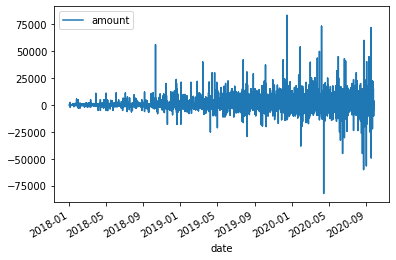

In [345]:
merged_df.plot(x='date', y = 'amount')

In [510]:
# Build a function to check which accounts have more than 180 days of history
# Got to group transactions by user and calculate activity period
# You can assume that any account passed to your service will have at least 6 months of history.
def more_180_days(df):
    
    column_names = ['date', 'amount', 'account_id', 'user_id']
    transactions_180  = pd.DataFrame(columns = column_names)
    #n_accounts = merged_df.account_id.nunique()
    account_numbers = df.account_id.unique()
    
    for i,j in enumerate(account_numbers):
        start_date = df[df.account_id==j].date.iloc[0]
        last_date = df[df.account_id==j].date.iloc[-1]
        account_age = pd.Timedelta(last_date - start_date).days
        if int(account_age) >= 180: 
            transactions_180 = transactions_180.append(df[df.account_id==j])
    return transactions_180

In [511]:
more_180_days(merged_df)

,date,amount,account_id,user_id
0,2019-12-16,-29.09,1,112
1,2019-12-16,160.00,1,112
2,2019-12-16,-14.00,1,112
3,2019-12-17,-94.50,1,112
4,2019-12-17,50.00,1,112
...,...,...,...,...
191362,2020-09-22,-20.00,439,77
191363,2020-09-23,-15.99,439,77
191364,2020-09-24,-1.70,439,77
191365,2020-09-24,-20.00,439,77


In [446]:
# TRIALS, ignore it
## for every account take first and last date diff
## build new dataset with diff > 180 days
# transactions_180 = []
# n_accounts = merged_df.account_id.nunique()

# for i in range(1):
#     start_date = merged_df[merged_df.account_id==i].date.iloc[0]
#     last_date = merged_df[merged_df.account_id==i].date.iloc[-1]
#     account_age = pd.Timedelta(last_date - start_date).days
#     if int(account_age) <= 180: 
#         transactions_180.append(merged_df[merged_df.account_id==i])

In [373]:
merged_df.describe()

,amount,account_id,user_id
count,181542.000000,181542.000000,181542.000000
mean,4.840099,225.050369,157.207649
std,1230.856862,127.042141,100.493586
min,-82201.680000,0.000000,0.000000
25%,-56.500000,110.000000,65.000000
50%,-16.750000,227.000000,150.000000
75%,-2.340000,337.000000,250.000000
max,83340.000000,440.000000,342.000000


In [363]:
merged_df[merged_df.account_id==5].date.iloc[-1] - merged_df[merged_df.account_id==5].date.iloc[0]

Timedelta('237 days 00:00:00')

In [347]:
grouped = merged_df.groupby(by='user_id',as_index=False).amount.sum()

In [348]:
grouped

,user_id,amount
0,0,214.95
1,1,11707.96
2,2,4373.56
3,3,10761.31
4,4,3738.96
...,...,...
338,338,-71.87
339,339,-9137.30
340,340,-1328.07
341,341,41.10


In [342]:
merged_df.date[1]-merged_df.date[0]

Timedelta('0 days 00:00:00')

# Modelling 

 want to use RNN because input data for RNN is:
- n sequences, n observations, n features

translated to this data: 
- n accounts, number of days when transactions were made, transaction amount